In [84]:
import numpy as np
from scipy import stats
from datetime import datetime
import fundamental as fd
from company_data import CompanyData
import importlib
import matplotlib.pyplot as plt
from iexfinance.stocks import Stock
import os

importlib.reload(fd)
importlib.reload(company_data)

<module 'company_data' from '/Users/mbpr/Desktop/AUB/2018-2019/Spring 2018-2019/FYP/QuantInvestFund/app/api/portfolio_explorer/company_data.py'>

In [48]:
os.environ['IEX_API_VERSION'] = 'iexcloud-beta'
os.environ['IEX_TOKEN'] = 'pk_172a73e7b4554b7ba9f06ebbad793dd3'

In [ ]:
stock = Stock('AAPL')
stock.get_key_stats()

In [ ]:
# data = data['financials_over_time']
pbv = []

for key in data:
    pbv.append(data[key]['pbv_ratio'])
    
pbv

In [120]:
fin = data["financials_over_time"]
x = []
y = []

for key in fin:
    date = datetime.fromisoformat(key).timestamp()
    x.append(date)
    y.append(fin[key]['debt_equity_ratio'])


In [121]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

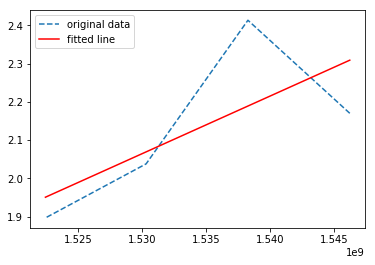

In [122]:
plt.plot(x, y, '--', label='original data')
plt.plot(x, intercept + slope*np.array(x), 'r', label='fitted line')
plt.legend()
plt.show()

In [123]:
print(r_value)

0.7018540150214722


In [129]:
data = CompanyData('AAPl', 'quarter', False).to_dict()
data

{'peers': ['MSFT', 'NOK', 'IBM', 'HPQ', 'GOOGL', 'BB', 'XLK'],
 'company_name': 'Apple Inc.',
 'shares_outstanding': 4715280000,
 'market_cap': 961256980800,
 'market_price': 203.86,
 'financials_over_time': {'2018-12-31': {'equity': 117892000000,
   'debt': 114730000000,
   'total_assets': 373719000000,
   'total_liabilities': 255827000000,
   'debt_equity_ratio': 2.1700115359820855,
   'book_value': 25.00212076483263,
   'pbv_ratio': 8.15370831608591,
   'risk': 178.8578792351674,
   'margin_of_safety': 578298832.5321299,
   'current_ratio': 1.4608270432753385},
  '2018-09-30': {'equity': 107147000000,
   'debt': 114483000000,
   'total_assets': 365725000000,
   'total_liabilities': 258578000000,
   'debt_equity_ratio': 2.4133013523477094,
   'book_value': 22.72335895217251,
   'pbv_ratio': 8.971384927249481,
   'risk': 181.1366410478275,
   'margin_of_safety': 525591091.92583144,
   'current_ratio': 1.4143701320297937},
  '2018-06-30': {'equity': 114949000000,
   'debt': 11460000000

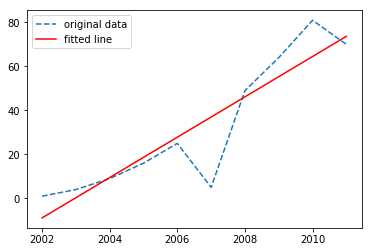

In [156]:
y = [1, 4, 9, 16, 25, 5, 49, 64, 81, 70]
x = range(2002, 2012)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

plt.plot(x, y, '--', label='original data')
plt.plot(x, intercept + slope*np.array(x), 'r', label='fitted line')
plt.legend()
plt.show()

In [164]:
out = [slope, intercept, r_value, p_value, std_err]


-18378.757575757576

In [175]:
bv = []

# if growth is stable, find average percent change in book value over last 4 years
for key in fin:
    bv.append(data['financials_over_time'][key]['book_value'])

np.mean([bv[i+1]/bv[i]-1 for i in range(len(bv)-1)])

0.02848318923074881

In [185]:
divs = stock.get_dividends(range = '5y')

In [188]:
[divs[i]['amount'] for i in range(len(divs))]

[0.73,
 0.73,
 0.73,
 0.73,
 0.63,
 0.63,
 0.63,
 0.63,
 0.57,
 0.57,
 0.57,
 0.57,
 0.52,
 0.52,
 0.52,
 0.52,
 0.47,
 0.47,
 0.47,
 3.29]

In [189]:
divs

[{'exDate': '2019-02-08',
  'paymentDate': '2019-02-14',
  'recordDate': '2019-02-11',
  'declaredDate': '2019-01-29',
  'amount': 0.73,
  'flag': 'No Change QoQ',
  'currency': 'USD',
  'description': 'Apple Declares Quarterly Dividend of $0.73 Per Share',
  'frequency': 'Quarterly'},
 {'exDate': '2018-11-09',
  'paymentDate': '2018-11-15',
  'recordDate': '2018-11-12',
  'declaredDate': '2018-11-01',
  'amount': 0.73,
  'flag': 'No Change QoQ',
  'currency': 'USD',
  'description': 'Apple Declares Quarterly Dividend of $0.73 Per Share ',
  'frequency': 'Quarterly'},
 {'exDate': '2018-08-10',
  'paymentDate': '2018-08-16',
  'recordDate': '2018-08-13',
  'declaredDate': '2018-07-31',
  'amount': 0.73,
  'flag': 'No Change QoQ',
  'currency': 'USD',
  'description': 'Apple Declares Quarterly Dividend of $0.73 Per Share ',
  'frequency': 'Quarterly'},
 {'exDate': '2018-05-11',
  'paymentDate': '2018-05-17',
  'recordDate': '2018-05-14',
  'declaredDate': '2018-05-01',
  'amount': 0.73,
